# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-18 21:17:20--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-18 21:17:20 (234 MB/s) - ‘test.dat’ saved [2844/2844]

--2024-02-18 21:17:20--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-18 21:17:20 (194 MB/s) - ‘train.dat’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [4]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data.append(instance)
    f.close()  # Don't forget to close the file when done
    return data

def dot_product(array1, array2):
    # Calculate and return dot product of array 1 and array 2
    return sum(x * y for x, y in zip(array1, array2))

def sigmoid(x):
    # Return output of sigmoid function on x
    return 1 / (1 + math.exp(-x))

def output(weights, instance):
    # Return the output of the model
    return sigmoid(dot_product(weights, instance[:-1]))

def predict(weights, instance):
    # Return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct / len(instances) * 100

# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) and epochs
def train_perceptron(instances, lr, epochs):
    # Initialize the weights (step: Initialization)
    weights = [0] * len(instances[0])

    # Training process
    for _ in range(epochs):
        for instance in instances:
            # Calculate the input value for the activation function (step: Activation)
            in_value = dot_product(weights, instance[:-1])
            # Calculate the output of the perceptron (step: Output Computation)
            out = sigmoid(in_value)
            # Calculate the error as the difference between actual and predicted output (step: Error Computation)
            error = instance[-1] - out
            # Adjust the weights (step: Weight Update)
            for i in range(len(weights)):
                # Update weights based on the error, learning rate, and input instance
                weights[i] += lr * error * out * (1 - out) * instance[i]

    return weights


## Run it

In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### In the training phase of a perceptron, using the sigmoid function allows for a continuous and differentiable output that is necessary for the gradient descent algorithm to work effectively. The predict function, however, returns a binary output which, while useful for making final predictions, does not provide the nuanced gradient information needed to perform small weight adjustments during training. A continuous output from the sigmoid function provides detailed feedback on the direction and magnitude of weight updates to minimize the error, whereas the binary output of predict lacks this nuance, making it impossible to perform the subtle updates to the weights that are required for the model to learn and converge to a solution. This is why the sigmoid function is used in the output computation within the training loop, as it facilitates the computation of gradients needed for the iterative process of weight optimization.










### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [8]:
# Define hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

# Load the data
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Iterate over each combination of hyperparameters
for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            # Calculate the number of instances to use for this training run
            size = round(len(instances_tr) * tr_size / 100)
            # Get the subset of training instances
            pre_instances = instances_tr[:size]
            # Train the perceptron
            weights = train_perceptron(pre_instances, lr, epochs)
            # Calculate accuracy on the test data
            accuracy = get_accuracy(weights, instances_te)
            # Output the results
            print(f"#tr: {size}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



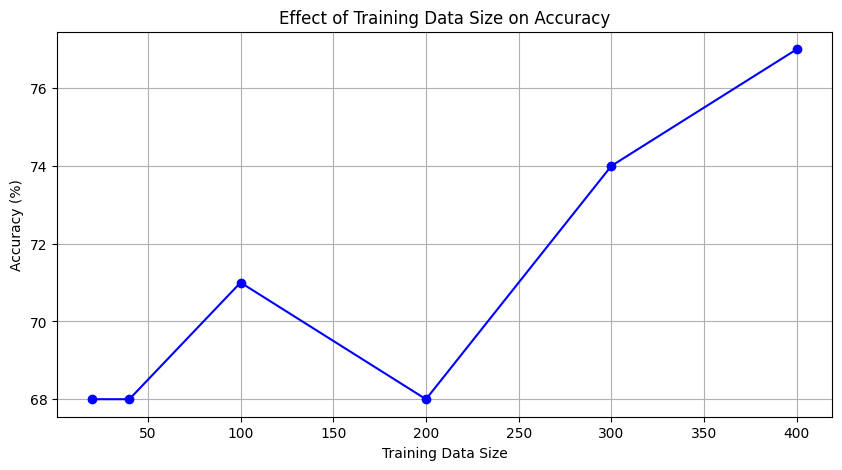

In [11]:
import matplotlib.pyplot as plt

train_sizes = [20, 40, 100, 200, 300, 400]  # Example training sizes
accuracies = [68.0, 68.0, 71.0, 68.0, 74.0, 77.0]  # Corresponding accuracies

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, accuracies, 'o-', color='blue')
plt.title('Effect of Training Data Size on Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


A. To get the best accuracy on the test dataset, it's not necessarily need to train using the whole training dataset. Training on a sizable and representative sample of the data, which captures the underlying patterns without adding noise or redundancy that might cause overfitting, is often the best way to achieve optimal performance. Striking a balance between the quantity of training data and the model's capacity for extrapolation from it is crucial.

B. There are a few possible reasons for the disparity in accuracy between the two runs, one of which is the variation in learning rates. In some cases, a faster learning rate might help the model avoid local minima and converge faster, which could improve performance on the test set. Additionally, the model's capacity to generalize may be harmed, leading to poorer accuracy, if the new data from the second run includes more noise or outliers.


C. By adjusting the hyperparameters more, accuracy may be increased. Performance may be enhanced by modifying the feature set, model architecture, learning rates, and even the number of epochs. The optimal set of hyperparameters must be determined via experimentation and validation.

D. Increasing the number of epochs of training does not ensure better model performance. If the number of epochs is very large, there is a chance that the training data will be overfit, which will result in worse performance on unknown data. The ideal number of training epochs may be determined with the use of validation accuracy monitoring.

